Centroid coordinates: (263, 101)


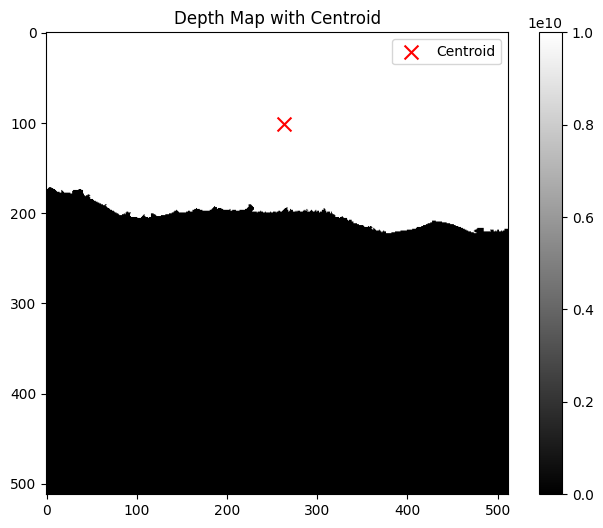

In [4]:
!pip install OpenEXR
import cv2
import numpy as np
import OpenEXR
import matplotlib.pyplot as plt
import Imath
import array

def find_centroid(depth_map_path):
    # Read the depth map image using OpenEXR
    exr_file = OpenEXR.InputFile(depth_map_path)
    dw = exr_file.header()['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

    # Extract the depth channel (assuming it's named 'Z')
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    (R,G,B) = exr_file.channels(["R", "G", "B"], FLOAT)
    depth_map = np.frombuffer(R, dtype=np.float32)
    depth_map.shape = (size[1], size[0])  # Numpy arrays are (row, col)

    # Thresholding to isolate the object (adjust threshold value as needed)
    _, thresh = cv2.threshold(depth_map, 50, 255, cv2.THRESH_BINARY)

    # Calculate moments of the thresholded image
    moments = cv2.moments(thresh.astype(np.uint8))  # Convert to uint8 for cv2.moments

    # Calculate centroid coordinates
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
        return cx, cy
    else:
        return None

def display_depth_map_with_centroid(depth_map_path):
    # Read the depth map image using OpenEXR
    exr_file = OpenEXR.InputFile(depth_map_path)
    dw = exr_file.header()['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

    # Extract the depth channel (assuming it's named 'Z')
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    (R,G,B) = exr_file.channels(["R", "G", "B"], FLOAT)
    depth_map = np.frombuffer(R, dtype=np.float32)
    depth_map.shape = (size[1], size[0])  # Numpy arrays are (row, col)

    # Find centroid
    centroid = find_centroid(depth_map_path)

    # Display the depth map
    plt.figure(figsize=(8, 6))
    plt.imshow(depth_map, cmap='gray')
    plt.title('Depth Map with Centroid')
    plt.colorbar()

    # Plot centroid if found
    if centroid:
        plt.scatter(centroid[0], centroid[1], marker='x', color='red', s=100, label='Centroid')
        plt.legend()
        print(f"Centroid coordinates: {centroid}")
    else:
        print("No object found or invalid depth map.")


    plt.show()


depth_map_path = "/content/00001Left.exr"

centroid = find_centroid(depth_map_path)
display_depth_map_with_centroid(depth_map_path)